A well known professor once made a comment about the normal distribution and how a material change in the mean can have a major impact out at the tails of the distribution.  At first I didn't really understand his comment because I thought, "Out at the tails the probabilities are tiny, so how could that be so important?"  If we look at a concrete example, however, then his point becomes much clearer (at least I think this is what he was referring to).  

For example, the height of humanoids generally follows a normal distribution.  Let's suppose that one group of people has an average height of 70 inches and another group has an average height of 73 inches.  Heights of individuals in both groups are normally distributed and have a standard distribution of 3 inches, so the difference in mean height between the two groups is equal to one standard deviation.

#### In each group what is the probability that someone is a *giant*, which we will define as someone with a height greater than or equal to 79 inches (6'9")?

In [1]:
import numpy as np
import math
import scipy.stats as stats
import scipy.integrate as integrate
import matplotlib.pyplot as plt

In [2]:
mean1 = 70
std = 3
mean2 = mean1 + std

# create list for each group that spans 5 standard deviations below and above the mean with increments of 0.25 inches
height_list1 = np.arange(mean1-std*5, mean1+std*5+0.25, 0.25)
height_list2 = np.arange(mean2-std*5, mean2+std*5+0.25, 0.25)

In [3]:
# set up normal distribution curve for each group for graphing
pdf1 = stats.norm.pdf(height_list1, mean1, std)
pdf2 = stats.norm.pdf(height_list2, mean2, std)

In [4]:
# set up normal probability density function for each group
def pdf1_norm(x):
    y = ((std*math.sqrt(2*math.pi))**(-1))*np.exp(-(x-mean1)**2/(2*std**2))
    return y

def pdf2_norm(x):
    y = (std*math.sqrt(2*math.pi))**(-1)*np.exp(-(x-mean2)**2/(2*std**2))
    return y

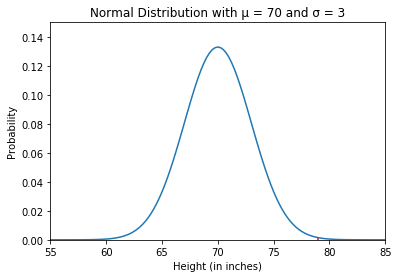

In [5]:
plt.xlim(55, 85)
plt.ylim(0, 0.15)
plt.axvline(mean1+std*3, ymax=pdf1_norm(mean1+std*3)/0.15, color='r')
plt.xticks(np.arange(55, 90, 5))
plt.xlabel('Height (in inches)')
plt.ylabel('Probability')
plt.title('Normal Distribution with μ = 70 and σ = 3')
plt.plot(height_list1, pdf1);

In the graph above the vertical line at height 79 is barely visible.

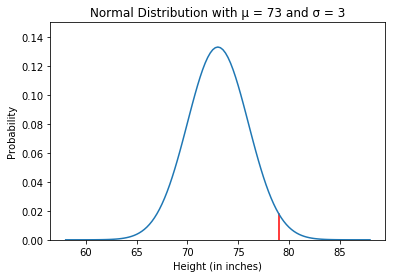

In [6]:
plt.ylim(0, 0.15)
plt.axvline(mean2+std*2, ymax=pdf2_norm(mean2+std*2)/0.15, color='r')
plt.xlabel('Height (in inches)')
plt.ylabel('Probability')
plt.title('Normal Distribution with μ = 73 and σ = 3')
plt.plot(height_list2, pdf2);

helpful link:

https://stackoverflow.com/questions/20011494/plot-normal-distribution-with-matplotlib

In both graphs we are concerned with the area to the right of the red line.  For the group with a mean height of 70, the red line at height 79 is barely visible.  In either group the probability of a person being a "giant" is quite low but it is much greater for the second group as we can see in the two graphs.

Next we will calculate the approximate area under each curve to the left of the red line.  This value represents the 

In [7]:
area1 = integrate.quad(pdf1_norm, mean1+std*3, math.inf)
print('probability of encountering a \'giant\' in the first group =', round(area1[0],5))

probability of encountering a 'giant' in the first group = 0.00135


In [8]:
area2 = integrate.quad(pdf2_norm, mean2+std*2, math.inf)
print('probability of encountering a \'giant\' in the second group =', round(area2[0],5))

probability of encountering a 'giant' in the second group = 0.02275
